## **lab 03 notes**

##### machine learning algorithms fall into 3 categories

### **1. supervised learning**

there is labelled data (features + correct answers)
- e.g. predicting if an email is spam (we already know spam vs not spam).
- includes classification (like **KNN, Decision Tree**) and **regression** (predicting numbers, like house prices)

### **2. unsupervised learning**

data has no labels, algorithm tries to find structure.
- e.g: grouping customers into segments with **K-Means Clustering**.  

### **3. reinforcement learning**

agent learns by trial-and-error with rewards.
- e.g. a robot learns to walk.

In [1]:
from sklearn.datasets import load_iris, make_blobs
import matplotlib.pyplot as plt

In [2]:
#supervised dataset: iris (features + labels)
iris = load_iris()
print(f"supervised dataset - features shape: {iris.data.shape}")
print(f"supervised dataset - labels shape: {iris.target.shape}")

supervised dataset - features shape: (150, 4)
supervised dataset - labels shape: (150,)


In a dataset like Iris, we have two parts:

**1.** **Features (X)** → The input measurements we use to make predictions.

-  In Iris: sepal length, sepal width, petal length, petal width.

-  Shape: (150, 4) → 150 samples, each with 4 features.

**2.** **Target (y)** → The “answer” or label we want the model to predict.

-  In Iris: which species of flower it is (0 = Setosa, 1 = Versicolor, 2 = Virginica).

-  Shape: (150,) → 150 values, one for each flower.


- *'iris.data.shape'* tells us the size of the feature matrix.

- *'iris.target.shape'* tells us how many labels we have.

They **must match** in the number of samples — **150 flowers** → **150 labels**.

👉 Think of it like an exam:

- The features are the exam questions each student answers.

- The target is the teacher’s answer key.

- For machine learning, we give the model both so it can learn the mapping.

## 🔢 **KNN (Mathematical View)**

The **K-Nearest Neighbors (KNN)** algorithm is based on a simple idea:

> "A point is classified by a majority vote of its neighbors."

### Steps:
1. **Choose K** → the number of neighbors to consider.  
   - Example: K = 3 means look at the 3 closest points.  

2. **Compute distance** between the new sample and all training samples.  
   - Most common: **Euclidean distance**  

   $$
   d(x, y) = \sqrt{\sum_{i=1}^n (x_i - y_i)^2}
   $$  

   where $x$ and $y$ are feature vectors.  

3. **Pick the K nearest neighbors** (smallest distances).  

4. **Majority vote (for classification)** or **average (for regression)**.  
   - Example: If K = 3 and neighbors’ labels are [0, 1, 1], the predicted label is **1**.  

---

## 👥 **KNN (Analogy)**

Imagine you’re new at school and want to know if you’ll like **cricket or football** better.  

- You look around at your **closest 3 friends** (neighbors).  
- If 2 of them like cricket and 1 likes football → you’ll probably like **cricket** too.  
- That’s KNN: look at who’s “closest” and follow the majority.  

The "closeness" here is **distance** in the feature space.


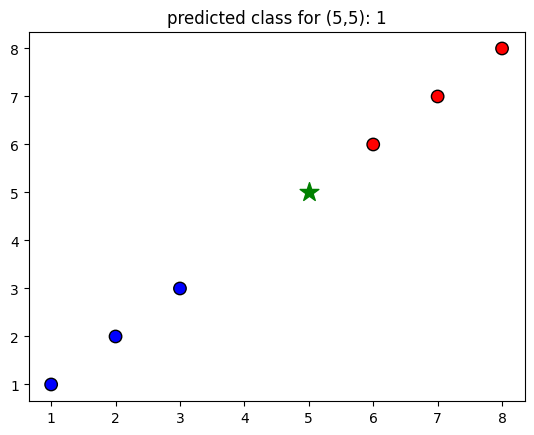

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

#1.create example dataset
#X = input features (2D pts)
#y = target labels
X = np.array([[1,1],[2,2],[3,3],[6,6],[7,7],[8,8]])
y = np.array([0,0,0,1,1,1]) #0=red class, 1=blue class

#2.initialize the KNN classifier
#n_neighbors=3 → the algorithm will look at 3 closest points
knn = KNeighborsClassifier(n_neighbors=3)

#3.train the model
#training a simple KNN with k=3
#.fit() → tells KNN to “remember” the dataset (X = features, y = labels)
#KNN doesn’t actually *learn equations* — it just stores the training data
knn.fit(X,y)

#4.make a prediction
#new_pt -> the sample we want to classify
new_point = np.array([[5,5]])
#.predict() -> checks which class (0 or 1) the new pt should belong to
pred = knn.predict(new_point)

#5.visualisation
#plotting the original training points
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', s=80, edgecolors='k')

#plot the new point (in green, shaped as a star)
plt.scatter(new_point[:,0], new_point[:,1], c='green', s=200, marker='*')

#title will show predicted class (either 0 or 1)
#0 -> red | 1 -> blue
plt.title(f"predicted class for (5,5): {pred[0]}")
plt.show()

# 📘 **Distance Metrics in KNN**

When KNN finds “neighbors,” it needs to measure how far points are from each other.  
Different distance metrics capture “closeness” in different ways.

### Common Distance Metrics:

- **Euclidean Distance (default, most common)**  
  Straight-line distance (like a ruler).  
  $$
  d(x,y) = \sqrt{\sum_{i=1}^n (x_i - y_i)^2}
  $$

- **Manhattan Distance**  
  Distance if you can only move along grid lines (like blocks in a city).  
  $$
  d(x,y) = \sum_{i=1}^n |x_i - y_i|
  $$

- **Minkowski Distance**  
  A generalization of Euclidean and Manhattan.

- **Hamming Distance**  
  Used for categorical data (counts how many features differ).

- **Cosine Distance**  
  Measures the angle between two vectors, not their length.

---

In [9]:
import numpy as np
from scipy.spatial import distance

#2 example pts
p1 = np.array([1,2])
p2 = np.array([4,6])

#euclidean distance(straight line dist)
euclidean = distance.euclidean(p1,p2)

#manhattan distance(grid/block distance)
manhattan = distance.cityblock(p1,p2)

#minkowski distance(p=3, we can change p val)
minkowski = distance.minkowski(p1, p2, p=3)

#cosine distance (1 - cosine_similarity)
cosine = distance.cosine(p1,p2)

#example for hamming distance (binary/categorical data)
#comparing two sequences of 0s and 1s
b1 = np.array([1,0,1,1])
b2 = np.array([1,1,0,1])
hamming = distance.hamming(b1,b2)

print("point 1:", p1)
print("point 2:", p2)
print("euclidean distance:", euclidean)
print("manhattan distance:", manhattan)
print("minkowski distance (p=3):", minkowski)
print("cosine distance:", cosine)
print("hamming distance (binary arrays):", hamming)

point 1: [1 2]
point 2: [4 6]
euclidean distance: 5.0
manhattan distance: 7
minkowski distance (p=3): 4.497941445275415
cosine distance: 0.007722123286332261
hamming distance (binary arrays): 0.5


# 📘 **Training vs Testing Accuracy**

When we train a machine learning model, we usually split the dataset into two parts:

- **Training set** → The data used to "teach" the model.  
- **Testing set** → Unseen data used to check how well the model generalizes.

### Key Points:
- **Training Accuracy**:  
  How well the model predicts on the same data it was trained on.  
  High training accuracy means the model learned patterns in the training data.

- **Testing Accuracy**:  
  How well the model predicts on unseen data.  
  High testing accuracy means the model *generalizes well*.

If a model has:
- High training accuracy but low testing accuracy → **Overfitting**.  
- Low training accuracy and low testing accuracy → **Underfitting**.  

The goal is to balance both → **Generalization**.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#load dataset
iris = load_iris()
X, y = iris.data, iris.target

#split into 80% training, and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train KNN with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

#predictions on training and testing sets
#➡ Uses the trained KNN model to predict labels:
#-On the training set (how well it memorized)
#-On the testing set (how well it generalizes).
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

#accuracy scores
#➡ Compares predictions against the true labels:
#train_acc = % correct on training data
#test_acc = % correct on unseen test data
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("training accuracy:", train_acc)
print("testing accuracy:", test_acc)

training accuracy: 0.95
testing accuracy: 1.0


# **Choosing K in KNN**

The number of neighbors **K** is the most important parameter in KNN.

- **Small K (e.g., K=1,2):**
  - Very flexible
  - Low bias, high variance
  - Can overfit (fits noise in training data)

- **Large K (e.g., K=10,20):**
  - Smoother decision boundary
  - High bias, low variance
  - Can underfit (misses details)

### Methods to choose K:
1. **Square Root Rule**:  
   K ≈ sqrt(number of training samples).  
   Example: if training set = 100 samples → K ≈ 10.  
   (Often choose an odd K to avoid ties.)

2. **Experimentation**:  
   Try different values of K and check accuracy on test data.  
   Plot training vs testing accuracy to see bias–variance tradeoff.

k=1: training accuracy=1.00, testing accuracy=1.00
k=2: training accuracy=0.97, testing accuracy=1.00
k=3: training accuracy=0.95, testing accuracy=1.00
k=4: training accuracy=0.96, testing accuracy=1.00
k=5: training accuracy=0.97, testing accuracy=1.00
k=6: training accuracy=0.97, testing accuracy=1.00
k=7: training accuracy=0.97, testing accuracy=0.97
k=8: training accuracy=0.96, testing accuracy=1.00
k=9: training accuracy=0.97, testing accuracy=1.00
k=10: training accuracy=0.98, testing accuracy=1.00


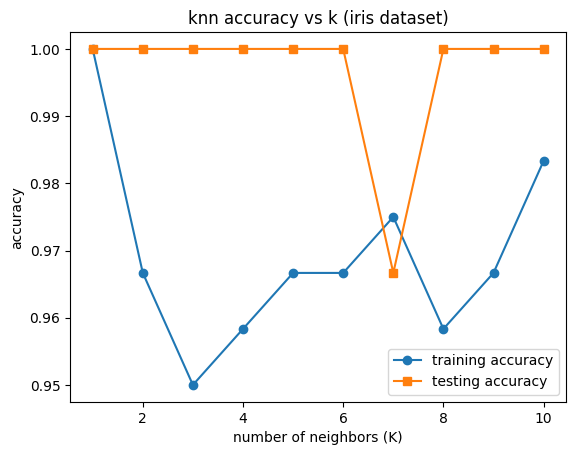

In [14]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Load dataset
iris = load_iris()
X, y = iris.data, iris.target

#Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#store accuracies
train_accuracies = []
test_accuracies = []

#trying k from 1 -> 10
for k in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    #training & testing predictions
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    
    #accuracy scores
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    
    print(f"k={k}: training accuracy={train_acc:.2f}, testing accuracy={test_acc:.2f}")

#plot
plt.plot(range(1, 11), train_accuracies, label="training accuracy", marker='o')
plt.plot(range(1, 11), test_accuracies, label="testing accuracy", marker='s')
plt.xlabel("number of neighbors (K)")
plt.ylabel("accuracy")
plt.title("knn accuracy vs k (iris dataset)")
plt.legend()

# **Bias–Variance Tradeoff**

When we train a machine learning model, two main sources of error appear:

- **Bias (Underfitting):**
  - Error from overly simple assumptions.
  - Model cannot capture the true patterns in the data.
  - Example: Using a straight line to fit a curved dataset.
  - Symptoms: Low training accuracy **and** low testing accuracy.

- **Variance (Overfitting):**
  - Error from being too sensitive to training data.
  - Model learns not only the patterns but also the noise.
  - Symptoms: High training accuracy but low testing accuracy.

### In KNN:
- **Small K (e.g., K=1):**
  - Very flexible → low bias but high variance.
  - Memorizes training data (100% training accuracy), but testing accuracy may drop.

- **Large K (e.g., K=10+):**
  - Smoother, less flexible → high bias but low variance.
  - Misses important details, leading to underfitting.

✅ The goal is to find a K that balances bias and variance → good **generalization**.

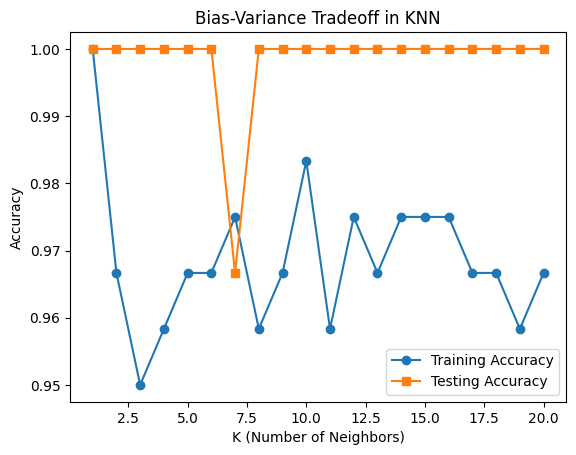

In [15]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load data
iris = load_iris()
X, y = iris.data, iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_acc_list, test_acc_list = [], []

# Try different K values
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    train_acc = accuracy_score(y_train, knn.predict(X_train))
    test_acc = accuracy_score(y_test, knn.predict(X_test))
    
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)

plt.plot(range(1, 21), train_acc_list, label="Training Accuracy", marker='o')
plt.plot(range(1, 21), test_acc_list, label="Testing Accuracy", marker='s')
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.title("Bias-Variance Tradeoff in KNN")
plt.legend()
plt.show()

# **Experiment: KNN with Different Weights and Metrics**

We will try:
1. `weights="uniform"` → all neighbors contribute equally.
2. `weights="distance"` → closer neighbors influence more.
3. `metric="euclidean"` → straight-line distance.
4. `metric="manhattan"` → grid/block distance.

We’ll compare training and testing accuracies for each setting.

In [16]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Settings to test
settings = [
    {"weights": "uniform", "metric": "euclidean"},
    {"weights": "distance", "metric": "euclidean"},
    {"weights": "uniform", "metric": "manhattan"},
    {"weights": "distance", "metric": "manhattan"},
]

# Try each setting with K=3
for s in settings:
    knn = KNeighborsClassifier(n_neighbors=3, weights=s["weights"], metric=s["metric"])
    knn.fit(X_train, y_train)
    
    train_acc = accuracy_score(y_train, knn.predict(X_train))
    test_acc = accuracy_score(y_test, knn.predict(X_test))
    
    print(f"K=3, Weights={s['weights']}, Metric={s['metric']}")
    print(f"  Training Accuracy: {train_acc:.2f}")
    print(f"  Testing Accuracy:  {test_acc:.2f}")
    print("-"*40)


K=3, Weights=uniform, Metric=euclidean
  Training Accuracy: 0.95
  Testing Accuracy:  1.00
----------------------------------------
K=3, Weights=distance, Metric=euclidean
  Training Accuracy: 1.00
  Testing Accuracy:  1.00
----------------------------------------
K=3, Weights=uniform, Metric=manhattan
  Training Accuracy: 0.95
  Testing Accuracy:  1.00
----------------------------------------
K=3, Weights=distance, Metric=manhattan
  Training Accuracy: 1.00
  Testing Accuracy:  1.00
----------------------------------------
